In [4]:
import sys
sys.path.append("..")
sys.path.append("../thermal_barrierlife_prediction")

from load_data import read_data
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import xarray as xr
import tensorflow as tf

## Patch Generation in tensorflow format

In [6]:
# Specify variables
image_shape_x = X.shape[1] # assuming the whole images are always square
total_images  = X.shape[0] # number of whole images
patch_width   = 256                   # width of the squared patches
num_patches   = 100                   # number of random patches per whole image


In [7]:
# initialize numpy array
x_patches   = np.zeros((total_images*num_patches, patch_width, patch_width ))
y_lifetime  = np.zeros((total_images*num_patches))
y_uncert    = np.zeros((total_images*num_patches))

In [8]:
for i in range(total_images):
    num_selected = 0
    while num_selected<  num_patches:
        random_x = random.randint(0, image_shape_x - patch_width)
        random_y = random.randint(0, image_shape_x - patch_width)
        x_patches[i*num_patches + num_selected,:,:] = X[i, random_x:random_x + patch_width, random_y:random_y + patch_width ]
        y_lifetime[i*num_patches + num_selected]    = Y[i]
        y_uncert[i*num_patches + num_selected]      = U[i]
        #generate random index
        num_selected +=1


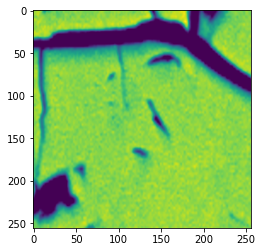

In [9]:
plt.imshow(x_patches[10000,:,:])

In [10]:
x_patches.shape

(22400, 256, 256)

In [15]:
patch_ds = xr.Dataset({'patches':xr.DataArray(x_patches)})
patch_ds['uncertainty'] = xr.DataArray(y_uncert)
patch_ds['lifetime']    = xr.DataArray(y_uncert)